# IBM Attrition Study

(à améliorer) Le but de cette étude est de prédire le taux d'attrition des employées d'IBM en fonction de plusieurs variables, qui concernent à la fois des données personnelles sur l'individu (son âge, son niveau d'étude, etc), des données professionelles (comme le département dans lequel l'individu travaille, son salaire, etc) et l'appréciation de l'individu sur son travail (qualité de ses relations avec ses collègues, work-life balance etc).

# Importation de la base de donnée et description de nos données

Téléchargement des données : Connectez vous sur une autre page de votre navigateur à votre compte Kaggle. 
Si vous n'avez pas de compte Kaggle, nous vous avons fourni en pièce jointe du mail la base de donnée

In [78]:
import urllib.request as ur
ur.urlretrieve ("https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv"
                , "WA_Fn-UseC_-HR-Employee-Attrition.zip")

('WA_Fn-UseC_-HR-Employee-Attrition.zip',
 <http.client.HTTPMessage at 0x10e4ab0b8>)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import sys

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.svm import LinearSVC

In [13]:
%matplotlib inline 
#pour que nos graphes soient inclus dans notre notebook, en dessous de notre code 

In [14]:
df = pd.read_table("WA_Fn-UseC_-HR-Employee-Attrition.csv", sep = ",")

#Première analyse de notre data set
print('Notre indexation:', df.index)
print('Notre base de donnée est constituée de', df.shape[1], 'variables et de', df.shape[0], 'observations. \n')

Notre indexation: RangeIndex(start=0, stop=1470, step=1)
Notre base de donnée est constituée de 35 variables et de 1470 observations. 



In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
print('Voyons nos variables ainsi que leur nombre de données manquantes:\n',df.isnull().sum()) # pas de Missing Values
print ("Il n'y a aucune données manquantes.")

Voyons nos variables ainsi que leur nombre de données manquantes:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
Yea

## Quelques explications sur certaines variables de notre base de données:

- EmployeeCount renvoie toujours le nombre '1', nous allons donc supprimer cette colonne
- EmployeeNumber correspond à un numéro unique associé à un employé
- JobRole correspond au titre d'une personne
- Percent salary hike: pourcentage d'augmentation de salaire entre 2015 et 2016. 
- Les variables Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction et StockOptionLevel  sont des variables qualitatives notées de 1 à 4 (ou à 5), 1 étant la pire note et 4 (ou 5)la meilleure. 
    - Pour Education: Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
    - Environment satisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
    - JobInvolvement: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
    - JobSatisfaction :  1 'Low' 2 'Medium' 3 'High' 4 'Very High'
    - PerformanceRating : 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
    - RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
    - WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

Nous n'avons pas trouvé d'explication pour HourlyRate, DailyRate et MonthlyRate, nous allons essayer de trouver une explication. 



In [17]:
print('Intéressons nous maintenant au type de chaque variable: \n', df.dtypes)

Intéressons nous maintenant au type de chaque variable: 
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int

Nous allons changer le type de certaines variables afin les transformer dans un format approprié et d'augmenter ainsi notre vitesse de calcul. Pour ce faire, nous avons considéré la valeur maximale de chaque variable et associé le format approprié. 

In [23]:
df = pd.read_table("WA_Fn-UseC_-HR-Employee-Attrition.csv", sep = ",")
print(sys.getsizeof(df))
df = pd.read_table("WA_Fn-UseC_-HR-Employee-Attrition.csv", sep = ",", dtype={
    'Age': np.int8, 
    'Attrition': str, 
    'BusinessTravel': str, 
    'DailyRate': np.int16, 
    'Department': str, 
    'DistanceFromHome': np.int8, 
    'Education': np.int8, 
    'EducationField': str, 
    'EmployeeCount': np.int8, 
    'EmployeeNumber': np.int16, 
    'EnvironmentSatisfaction':np.int8, 
    'Gender': str,
    'JobRole': str, 
    'MaritalStatus': str,
    'Over18': str, 
    'OverTime': str, 
    'HourlyRate' :np.int8,
    'JobInvolvement': np.int8,
    'JobLevel': np.int8,
    'JobSatisfaction': np.int8, 
    'MonthlyIncome': np.int16, 
    'MonthlyRate': np.int16,
    'NumCompaniesWorked': np.int8, 
    'PercentSalaryHike': np.int8,
    'PerformanceRating': np.int8,
    'RelationshipSatisfaction': np.int8,
    'StandardHours': np.int8,
    'StockOptionLevel': np.int8,
    'TotalWorkingYears': np.int8,
    'TrainingTimesLastYear': np.int8,
    'WorkLifeBalance': np.int8,
    'YearsAtCompany': np.int8,
    'YearsInCurrentRole': np.int8,
    'YearsSinceLastPromotion': np.int8,
    'YearsWithCurrManager': np.int8})
print(sys.getsizeof(df))

1183073
921413


# Preprocessing -Tentatives d'explications de certaines variables :

Essayons de trouver une explication à HourlyRate, DailyRate et MonthlyRate. 

### HourlyRate, DailyRate, MonthlyRate

In [24]:
print(df["HourlyRate"].describe())
print(df['DailyRate'].describe())
print(df['MonthlyRate'].describe())

# HourlyRate en %
# Hypothèse la plus plausible : HourlyRate est un taux de performance par heure (ou efficacité)

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64
count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64
count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64


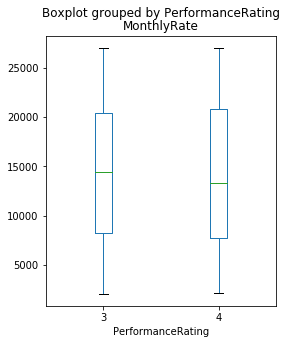

In [30]:
df.boxplot('MonthlyRate', by = 'PerformanceRating', grid = False, figsize = (4,5))

In [59]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

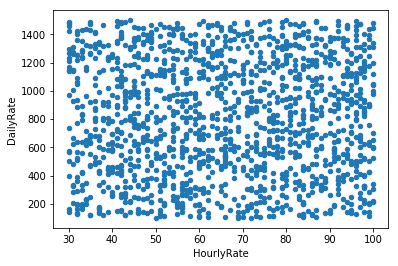

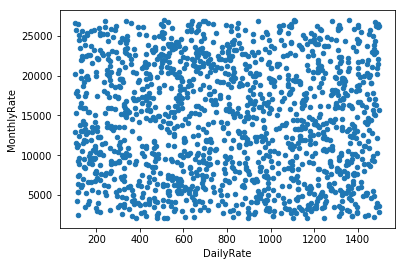

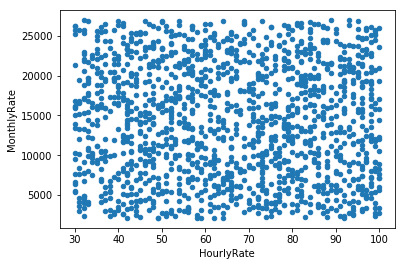

In [22]:
#Lien entre DailyRate, HourlyRate et MonthlyRate

df.plot(x = 'HourlyRate', y = 'DailyRate', kind = 'scatter')
df.plot(x = 'DailyRate', y = 'MonthlyRate', kind = 'scatter')
df.plot(x = 'HourlyRate', y = 'MonthlyRate', kind = 'scatter')

# Pas de relation linéaire entre les 3 variables 

In [23]:
# Unité de mesure de DailyRate?

# Hypothese 1: 802 = 8:02 ? en moyenne, fait sens
#mais min et max impossibles (1h/jour vs 14h/jour ?)

# Regardons s'il y a bien une corrélation avec OverTime
print(df["OverTime"].head())
print(df[df['OverTime']=='Yes']['DailyRate'].describe())

# Certaines personnes en Overtime travaillent toujours 1h/ jour : Hypothèse 1 rejetée

0    Yes
1     No
2    Yes
3    Yes
4     No
Name: OverTime, dtype: object
count     416.000000
mean      808.350962
std       407.262601
min       103.000000
25%       463.250000
50%       799.000000
75%      1171.750000
max      1498.000000
Name: DailyRate, dtype: float64


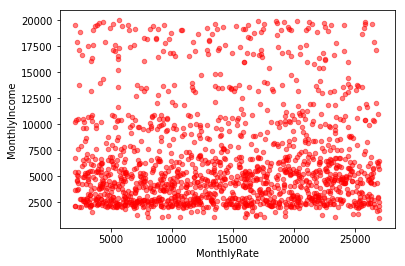

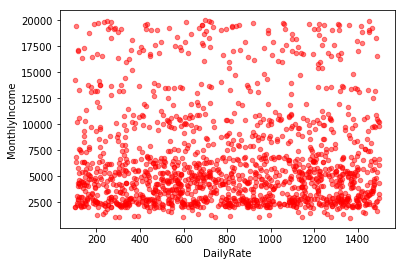

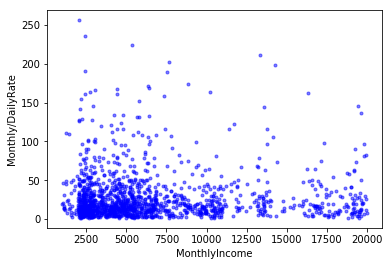

In [24]:
# Hypothèse 2: MonthlyRate et DailyRate sont liés au revenu par jour/par mois

df.plot(x = 'MonthlyRate', y = 'MonthlyIncome', kind = 'scatter', alpha = 0.5, color = 'red') # alpha = transparence
df.plot(x = 'DailyRate', y = 'MonthlyIncome', kind = 'scatter', alpha = 0.5, color = 'red') 

# pas de relation linéaire ici encore entre MonthlyIncome en fonction de MonthlyRate et MonthlyIncome en fonction de DailyRate
# Hypothèse 2 rejetée

#MonthlyRate et DailyRate ont le même comportement en fonction de MonthlyIncome
fig, ax = plt.subplots(1,1)
ax.plot(df['MonthlyIncome'], df['MonthlyRate']/df['DailyRate'], '.', alpha = 0.5, color = 'blue')
ax.set_xlabel("MonthlyIncome")
ax.set_ylabel('Monthly/DailyRate')
plt.show()

#Toujours pas de relation linéaire mais relation similaire à 1/x.... SIGNIFICATION ??

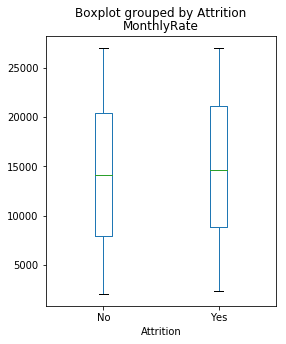

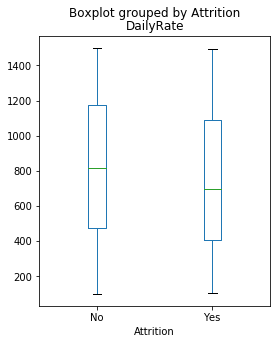

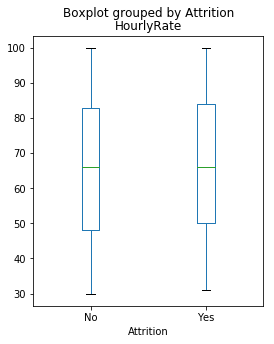

In [25]:
df.boxplot('MonthlyRate', by = 'Attrition', grid = False, figsize = (4,5))
df.boxplot('DailyRate', by = 'Attrition', grid = False, figsize = (4,5))
df.boxplot('HourlyRate', by = 'Attrition', grid = False, figsize = (4,5))

# MonthlyRate n'est pas significatif pour expliquer l'attrition, HourlyRate non plus, DailyRate un peu plus
# CONCLUSION: On va considérer que DailyRate est un indice de performance d'unité inconnue, et MonthlyRate NS - à éliminer


### EmployeeCount, EmployeeNumber, StandardHours & Over18

In [26]:
print(df['EmployeeCount'].unique()) # A supprimer : 1 partout
print(df['StandardHours'].unique()) # A supprimer : 80 pour tout le monde
print(df['EmployeeNumber'].describe()) # A supprimer : matricule de l'employé

print(df[df['Over18']== 'Y'].shape[0])
print(df[df['Over18']=='N'].shape[0]) # A supprimer : Yes pour tout le monde

[1]
[80]
count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: EmployeeNumber, dtype: float64
1470
0


# Preprocessing - Etude de la population

Le but est ici de voir quel type de population, notamment pour les variables qualitatives

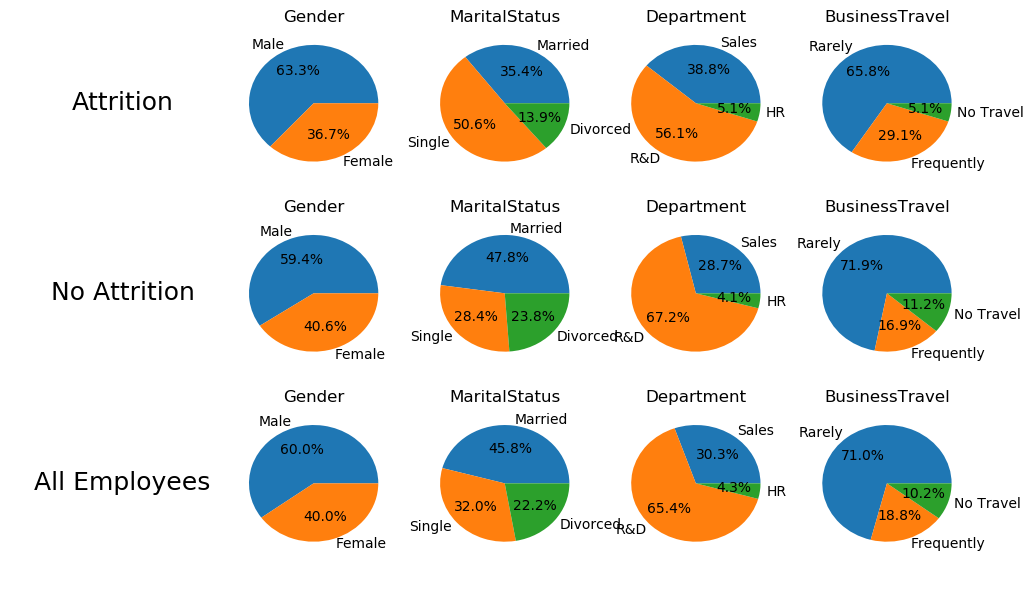

In [32]:
# Diagrammes en camembert de répartition de certaines caractéristiques dans la population
# Données sociologiques : Gender, MaritalStatus
# Données RH : Department, BusinessTravel

df0 = df[df['Attrition']=='Yes']
df1 = df[df['Attrition']=='No']
dA = [df0, df1, df]

fig = plt.figure(figsize=(10,6), dpi=100)
grid = gridspec.GridSpec(3,5)

plt.subplot(grid[0,0])
plt.axis('off')
plt.text(0.5,0.5, 'Attrition', ha='center', va='center', size = 18)

plt.subplot(grid[1,0])
plt.axis('off')
plt.text(0.5,0.5, 'No Attrition', ha='center', va='center', size = 18)

plt.subplot(grid[2,0])
plt.axis('off')
plt.text(0.5,0.5, 'All Employees', ha='center', va='center', size = 18)

i = 0
for d in dA:
   
    lab1 = ['Male','Female']
    frac1=[d[d['Gender']== 'Male'].shape[0],
          d[d['Gender']== 'Female'].shape[0]]

    lab2 = ['Married','Single','Divorced']
    frac2=[d[d['MaritalStatus']== 'Married'].shape[0],
          d[d['MaritalStatus']== 'Single'].shape[0],
          d[d['MaritalStatus']== 'Divorced'].shape[0]]

    lab3= ['Sales','R&D','HR']
    frac3=[d[d['Department']== 'Sales'].shape[0],
          d[d['Department']== 'Research & Development'].shape[0],
          d[d['Department']== 'Human Resources'].shape[0]]

    lab4 = ['Rarely','Frequently','No Travel']
    frac4=[d[d['BusinessTravel']== 'Travel_Rarely'].shape[0],
          d[d['BusinessTravel']== 'Travel_Frequently'].shape[0],
          d[d['BusinessTravel']== 'Non-Travel'].shape[0]]

    plt.subplot(grid[i,1])
    plt.pie(frac1, labels=lab1, autopct='%1.1f%%')
    plt.title('Gender')

    plt.subplot(grid[i,2])
    plt.pie(frac2, labels=lab2, autopct='%1.1f%%')
    plt.title('MaritalStatus')

    plt.subplot(grid[i,3])
    plt.pie(frac3, labels=lab3, autopct='%1.1f%%')
    plt.title('Department')

    plt.subplot(grid[i,4])
    plt.pie(frac4, labels=lab4, autopct='%1.1f%%')
    plt.title('BusinessTravel')
    
    i += 1 

plt.tight_layout()
plt.show()


# Le plus flagrant : les personnes célibataires sont plus susceptibles de partir que les personnes mariées
# les hommes ont un peu plus tendance à partir que les femmes
# le département le plus concerné par les départs est le département des Sales, ensuite les RH
# les personnes partant fréquemment en voyages d'affaire sont plus susceptibles de partir


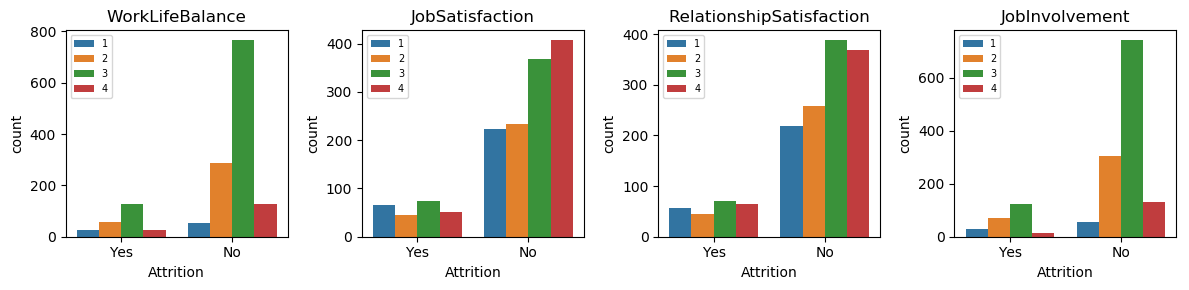

In [35]:
# Variables discrètes - diagrammes en bar
# Qualité de vie : WorkLifeBalance, JobInvolvement, JobSatisfaction, , RelationshipSatisfaction

fig = plt.figure(figsize=(12,3), dpi=100)
grid = gridspec.GridSpec(1,4)

col = ['WorkLifeBalance','JobSatisfaction', 'RelationshipSatisfaction','JobInvolvement']
i = 0

for c in col:
    plt.subplot(grid[0,i])
    sns.countplot(x= 'Attrition', hue = c, data= df)
    plt.title(c)
    plt.legend(prop={'size':7})
    i +=1

plt.tight_layout()
plt.show()

# l'équilibre de vie n'a pas l'air d'être déterminant dans le départ
# Par contre la satisfaction du travail et des relations l'est
# la plupart des gens partant sont impliqués dans leur travail

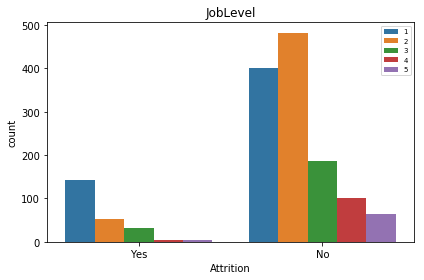

In [41]:
sns.countplot(x= 'Attrition', hue = 'JobLevel', data= df)
plt.title('JobLevel')
plt.legend(prop={'size':7})
plt.tight_layout()
plt.show()

In [53]:
sorted(df['JobLevel'].unique())

[1, 2, 3, 4, 5]

In [54]:
# définissons une fonction pour faire des pourcentages: 
# on veut le nombre d'attrition par catégorie
# le nombre total par catégorie 


def attrition_per_categorie(data, column): 
    for sorted(df[column].unique()) 



[1, 2, 3, 4, 5]

In [55]:
df['StockOptionLevel'].unique()

array([0, 1, 3, 2])

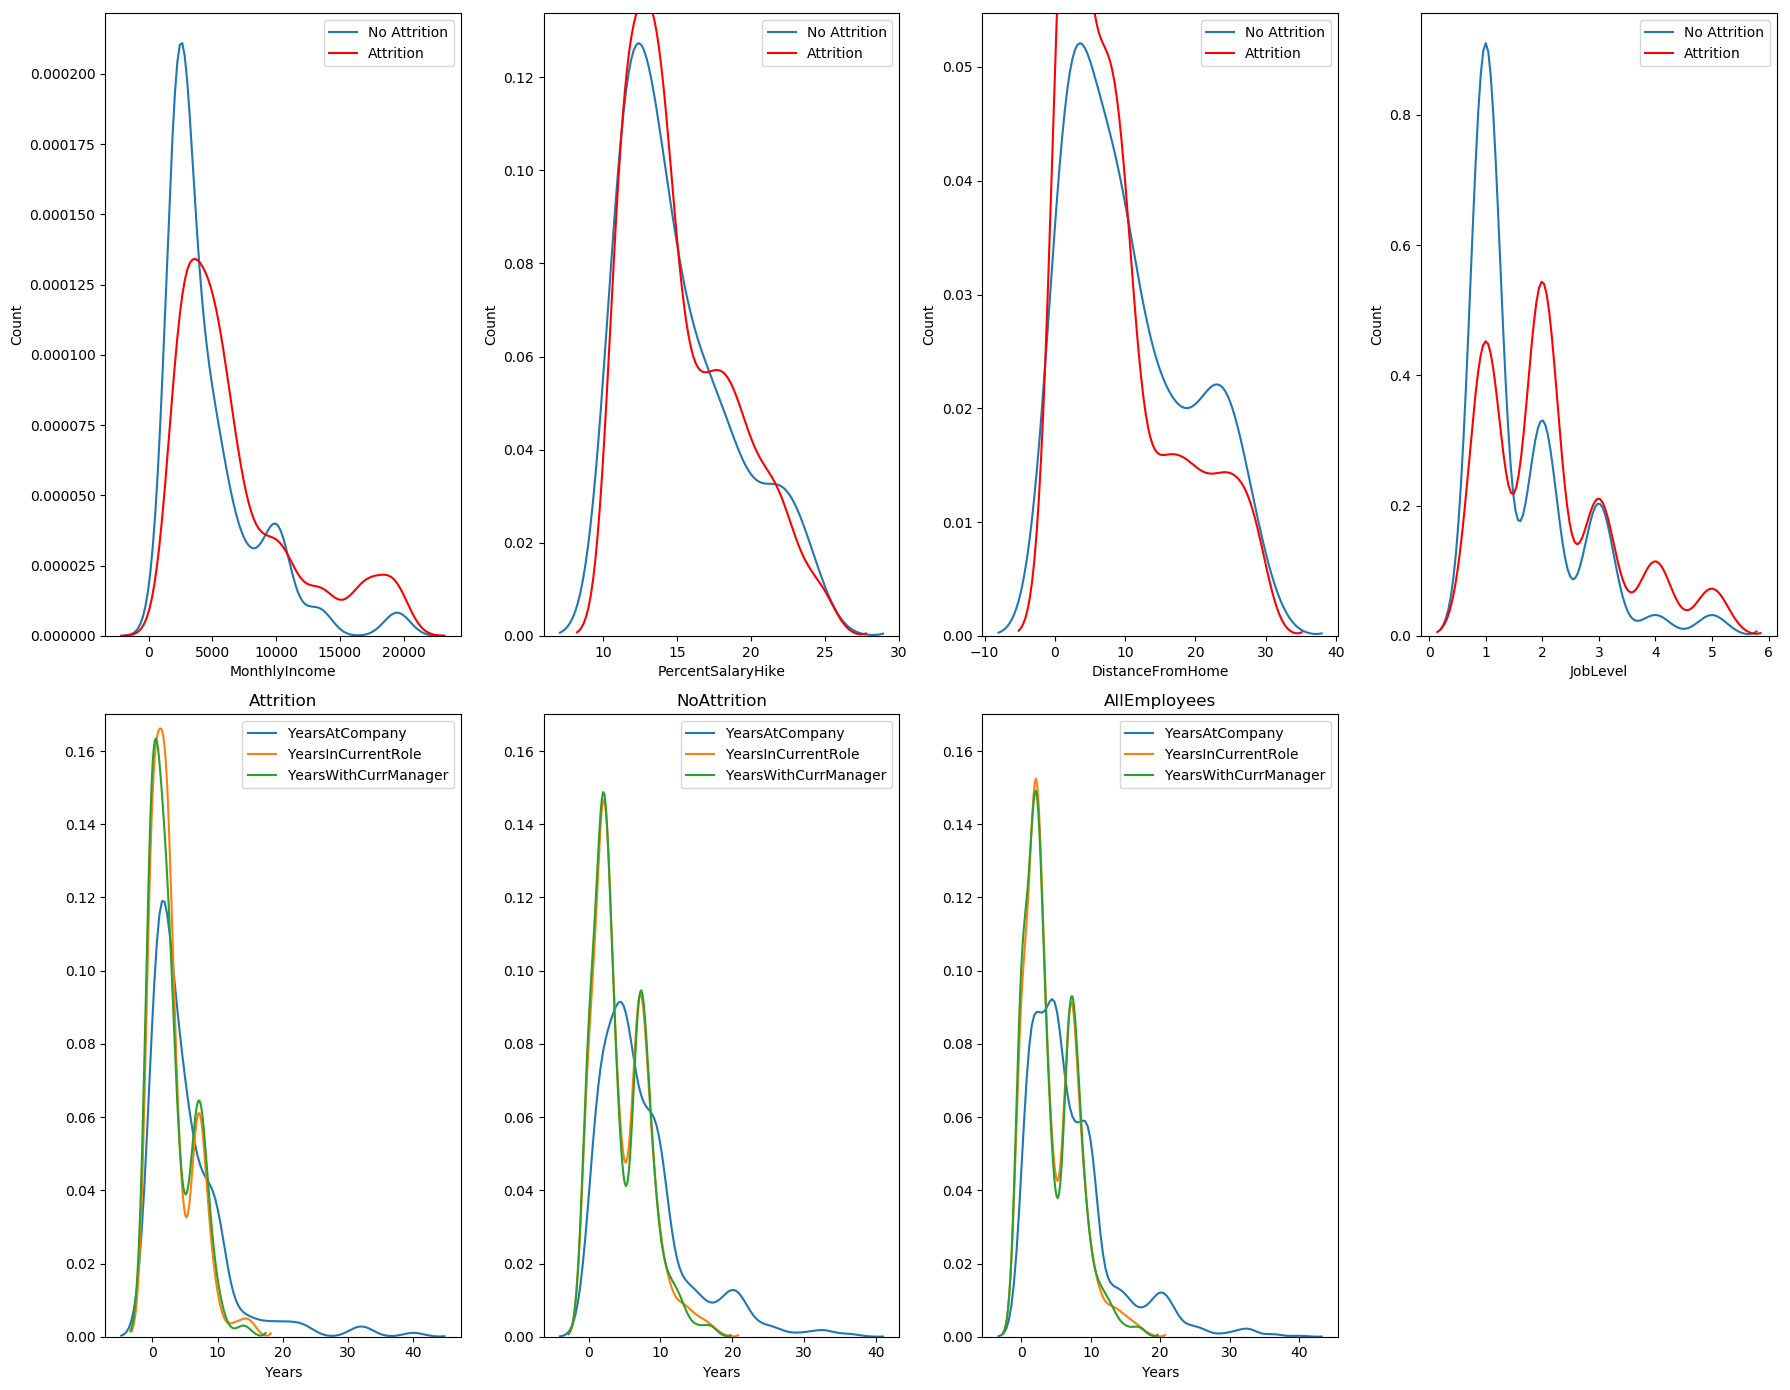

In [53]:
# Variables quantitatives
# MonthlyIncome, PercentSalaryHike, PerformanceRating, DistanceFromHome
# Ancienneté : YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, JobLevel

fig = plt.figure(figsize=(18,14), dpi=100)
grid = gridspec.GridSpec(2,4)

col = ['MonthlyIncome','PercentSalaryHike', 'DistanceFromHome', 'JobLevel']
i = 0
for c in col:
    plt.subplot(grid[0,i])
    sns.distplot(df0[c], kde = True, hist = False, label = 'No Attrition')
    sns.distplot(df1[c], kde = True, color = 'red', hist = False, label = 'Attrition')
    plt.ylabel('Count')
    i +=1

title = ['Attrition','NoAttrition','AllEmployees']
j = 0
for d in dA:
    plt.subplot(grid[1,j])
    sns.distplot(d['YearsAtCompany'], kde = True, hist = False, label = 'YearsAtCompany')
    sns.distplot(d['YearsInCurrentRole'], kde = True, hist = False, label = 'YearsInCurrentRole')
    sns.distplot(d['YearsWithCurrManager'], kde = True, hist = False, label = 'YearsWithCurrManager')
    plt.legend(prop={'size':10}, loc=1)
    plt.ylim([0,0.17])
    plt.xlabel('Years')
    plt.title(title[j])
    j +=1

plt.tight_layout()
plt.show()


In [31]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Logistic Regression


In [32]:
# Création de variables binomiales pour remplacer certaines variables qualitatives

df['Gender_int'] = pd.get_dummies(df['Gender'], drop_first = True)
df['OverTime_int'] = pd.get_dummies(df['OverTime'], drop_first = True)
df['Attrition_int'] = pd.get_dummies(df['Attrition'], drop_first = True)

# Correspondance

corres1 = ['Attrition','Attrition_int']
corres2 = ['Gender', 'Gender_int']
corres3 = ['OverTime','OverTime_int']

print(df[corres1].drop_duplicates())
print(df[corres2].drop_duplicates())
print(df[corres3].drop_duplicates())

  Attrition  Attrition_int
0       Yes              1
1        No              0
   Gender  Gender_int
0  Female           0
1    Male           1
  OverTime  OverTime_int
0      Yes             1
1       No             0


In [78]:
# DataFrame Clean - avec colonnes en moins

col = ['Attrition','BusinessTravel','Department','Education','EducationField','EmployeeCount', 'EmployeeNumber','Gender','HourlyRate','JobRole','MaritalStatus', 'MonthlyRate','Over18', 'OverTime', 'StandardHours', 'YearsInCurrentRole', 'YearsWithCurrManager']
dfc = df.drop(col, 1)

print(dfc.columns)
print(dfc.shape)


Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'Gender_int', 'OverTime_int',
       'Attrition_int'],
      dtype='object')
(1470, 21)


In [79]:
# Couper la base de donnée en 2 : training_set/test_set

X = dfc.iloc[:, :20] # covariates
y = dfc.iloc[:,20] # output - binomial

train, test = train_test_split(dfc, train_size=0.8)
X_train = train.iloc[:,:20]
y_train = train.iloc[:, 20]
X_test = test.iloc[:,:20]
y_test = test.iloc[:,20]

print(X_train.shape)
print(X_test.shape) #ok

(1176, 20)
(294, 20)


In [86]:
# Regression Logistique

logreg = LogisticRegression(random_state = 0) #  If int, random_state is the seed used by the random number generator
res_log = logreg.fit(X_train,y_train)

# Coefficients

print('Intercept', res_log.intercept_)
coef = pd.DataFrame(np.array(res_log.coef_).reshape(20,1))
var = pd.DataFrame(np.array(X.columns).reshape(20,1))
CoefLogReg = pd.merge(var,coef, left_index= True, right_index = True)
print(CoefLogReg)
                   
# Variables ayant le plus d'impact sur le résultat (Attrition ou non), dans l'ordre décroissant :
# OverTime, PerformanceRating,  JobInvolvement, StockOptionLevel, JobSatisfaction, Gender, YearsSinceLastPromotion

Intercept [ 0.25800324]
                         0_x       0_y
0                        Age -0.000240
1                  DailyRate -0.000165
2           DistanceFromHome  0.033445
3    EnvironmentSatisfaction -0.224462
4             JobInvolvement -0.371926
5                   JobLevel  0.028599
6            JobSatisfaction -0.261700
7              MonthlyIncome -0.000075
8         NumCompaniesWorked  0.165114
9          PercentSalaryHike -0.037557
10         PerformanceRating  0.571256
11  RelationshipSatisfaction -0.205762
12          StockOptionLevel -0.612764
13         TotalWorkingYears -0.093226
14     TrainingTimesLastYear  0.006320
15           WorkLifeBalance -0.119954
16            YearsAtCompany  0.027303
17   YearsSinceLastPromotion  0.056183
18                Gender_int  0.344948
19              OverTime_int  1.348570


In [91]:
# Prediction sur le training set

y_predlog = res_log.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_predlog)
y_score = res_log.score(X_test,y_test)

print(conf_matrix)
print(y_score)

# TPR + FPR = 242 + 11 

[[242   1]
 [ 40  11]]
0.860544217687


# Linear Support Vector Machine

In [113]:
# Linear Support Vector Machine

svm = LinearSVC()
res_svm = svm.fit(X_train,y_train)

# Prediction

y_predsvm = res_svm.predict(X_test)
conf_mat_svm = confusion_matrix(y_test, y_predsvm)
y_score_svm = res_svm.score(X_test,y_test)

print(conf_mat_svm)
print(y_score_svm)

[[233  10]
 [ 47   4]]
0.80612244898


# Comparaison des deux modèles prédictifs

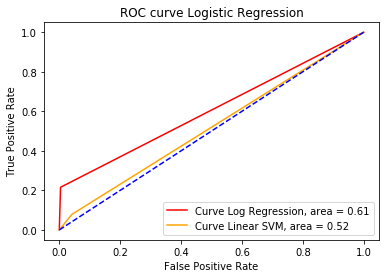

In [114]:
# ROC CURVE

fpr_log, tpr_log,threshold = roc_curve(y_test,y_predlog)
log_auc= auc(fpr_log,tpr_log)

fpr_svm, tpr_svm, threshold = roc_curve(y_test,y_predsvm)
svm_auc = auc(fpr_svm,tpr_svm)
plt.figure()
plt.plot(fpr_log, tpr_log, color = 'red', label = 'Curve Log Regression, area = %0.2f' %log_auc)
plt.plot(fpr_svm, tpr_svm, color = 'orange', label = 'Curve Linear SVM, area = %0.2f' %svm_auc)
plt.plot([0,1],[0,1], color = 'blue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve Logistic Regression')
plt.legend(loc = 'lower right')
plt.show()

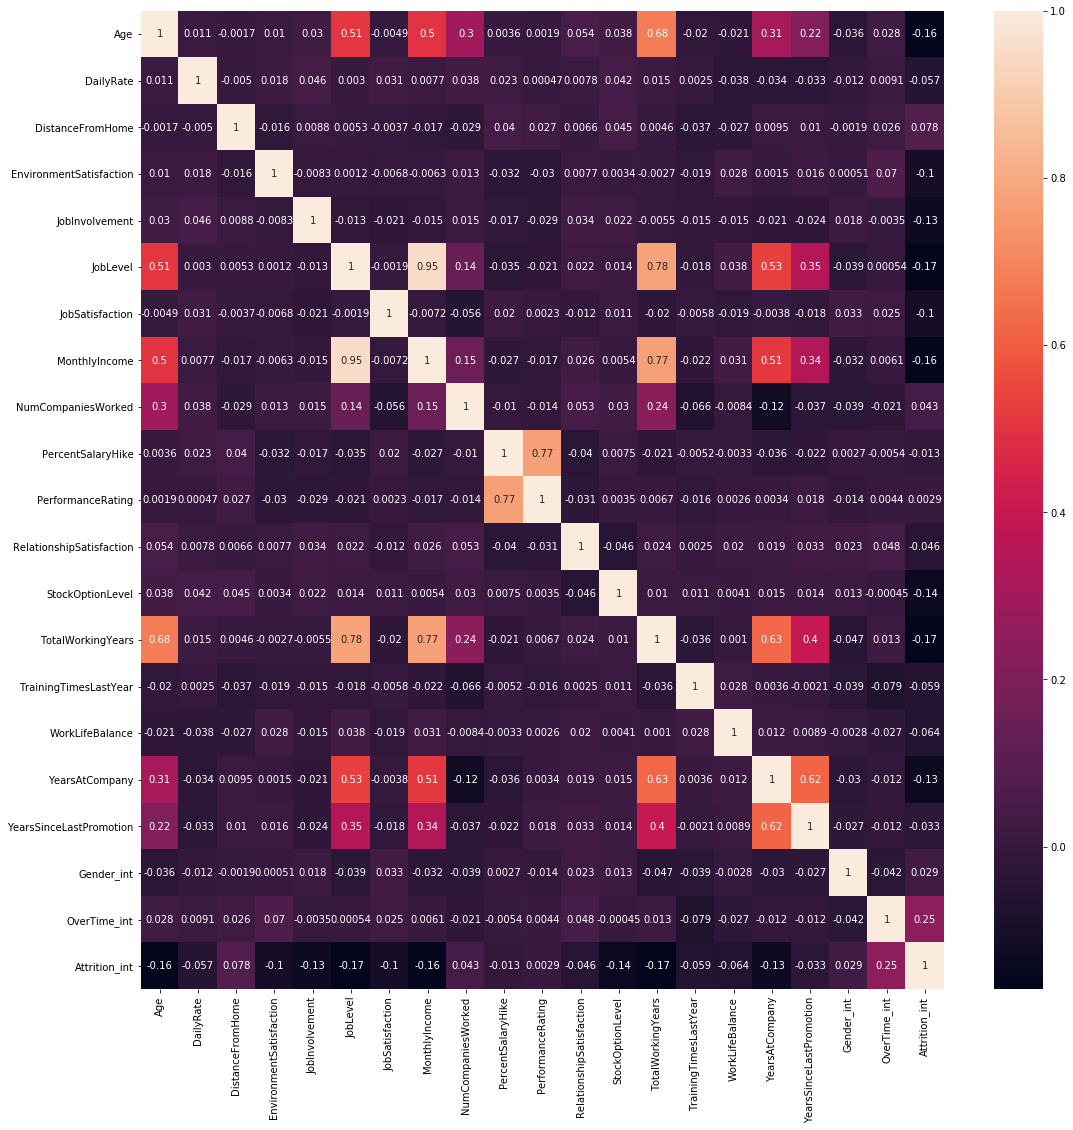

In [84]:
##################### BROUILLON ########################################

#Matrice de corrélation - transformer Attrition en int

fig2,ax2 = plt.subplots(figsize=(18, 18))
sns.heatmap(dfc.corr(), annot = True) 

## BEAUCOUP TROP GROS,le but est d'avoir une matrice plutôt claire en ne gardant que les facteurs intéressants